# Clustering 

## 1. DBSCAN
Using DBSCAN iterate (for-loop) through different values of `min_samples` (1 to 10) and `epsilon` (.05 to .5, in steps of .01)  to find clusters in the road-data used in the Lesson and calculate the Silhouette Coeff for `min_samples` and `epsilon`. Plot **_one_** line plot with the multiple lines generated from the min_samples and epsilon values. Use a 2D array to store the SilCoeff values, one dimension represents `min_samples`, the other represents epsilon.

Expecting a plot of `epsilon` vs `sil_score`.

In [1]:
import pandas as pd
import numpy as np
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.size'] = 14
# plt.rcParams['figure.figsize'] = (20.0, 10.0)
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
X = pd.read_csv('../data/3D_spatial_network.txt.gz', header=None, names=['osm', 'lat','lon','alt'])
X = X.drop(['osm'], axis=1).sample(10000)
X.head()

,lat,lon,alt
285523,9.680779,56.821868,48.334568
408925,9.672000,57.196983,11.254733
342664,10.152136,57.210470,36.291627
16395,10.503986,57.445843,18.662809
289368,10.064142,56.928708,7.032258


In [3]:
min_samples = np.arange(1, 11, 1)
epsilons = np.arange(0.05, 0.51, .01)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
X_scaled

array([[-0.0838076 , -0.9106611 ,  1.3795639 ],
       [-0.09778497,  0.39039962, -0.59772893],
       [ 0.6666755 ,  0.43717905,  0.73737065],
       ...,
       [ 0.23313734, -0.14970004, -0.33517055],
       [ 0.85309617,  0.97115554,  1.96098908],
       [ 0.16447377, -0.25875689, -0.51482154]])

In [5]:
all_scores = []
for min_sample in min_samples:
    scores = []
    for epsilon in epsilons:
        dbscan = DBSCAN(eps= epsilon, min_samples = min_sample)
        labels = dbscan.fit_predict(X_scaled)
        # calculate silhouette score here
        score = silhouette_score(X_scaled, labels)
        
        scores.append(score)
        
    all_scores.append(scores)

In [6]:
all_scores = np.array(all_scores)

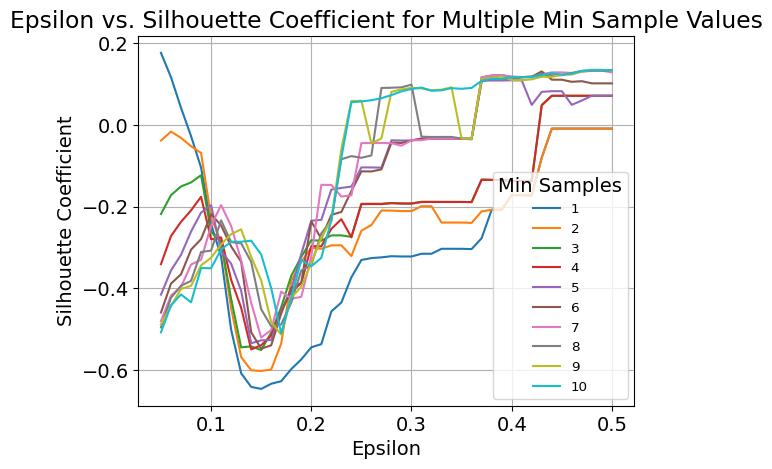

In [7]:
# plot the results
plt.figure()
for i, min_sample in enumerate(min_samples):
    plt.plot(epsilons, all_scores[i, :], label=f'{min_sample}')

plt.xlabel('Epsilon')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.legend(title = 'Min Samples', fontsize = 'x-small')
plt.title('Epsilon vs. Silhouette Coefficient for Multiple Min Sample Values')
plt.show()

## 2. Clustering your own data
Using your own data, find relevant clusters/groups within your data (repeat the above). If your data is labeled with a class that you are attempting to predict, be sure to not use it in training and clustering. 

You may use the labels to compare with predictions to show how well the clustering performed using one of the clustering metrics (http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation). 

If you don't have labels, use the silhouette coefficient to show performance. Find the optimal fit for your data but you don't need to be as exhaustive as above.

Additionally, show the clusters in 2D or 3D plots. 

As a bonus, try using PCA first to condense your data from N columns to less than N.

Two items are expected: 
- Metric Evaluation Plot (like in 1.)
- Plots of the clustered data

In [8]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn import metrics

wine = pd.read_csv('../data/wine.data', names = ['class', 'alcohol', 'malic acid', 'ash', 'aclalinity of ash', 'magnesium', 'total phenols',
                                                 'flavanoids', 'nonflavanoids phenols', 'proanthocyanins', 'color intensity', 'hue', 
                                                 'od280/od315 of diluted wines', 'proline'])

In [9]:
wine.head()

,class,alcohol,malic acid,ash,aclalinity of ash,magnesium,total phenols,flavanoids,nonflavanoids phenols,proanthocyanins,color intensity,hue,od280/od315 of diluted wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
wine.dropna(inplace=True)

In [11]:
centers = [[1, 1], [-1, -1], [1, -1]]
X = wine.drop(columns=['class'])
y = wine['class'].copy()

### Silhouette Score Evaluation for Original (Scaled) Data

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
k_range = range(2, 11)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    labels = km.fit_predict(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, labels))

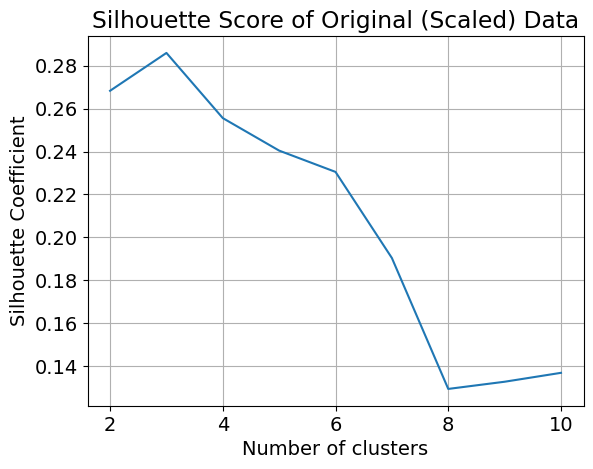

In [14]:
plt.figure()
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Score of Original (Scaled) Data')
plt.grid(True)
plt.show()

It makes sense that 3 clusters would result in the highest silhouette coefficient, as the original data is categorized into 3 wine classes. 

### PCA Reduced to 10 components

In [15]:
pca = decomposition.PCA(n_components=10)
pca.fit(X)
X = pca.transform(X)

In [16]:
scores2 = []
for k in k_range:
    km2 = KMeans(n_clusters=k, random_state=1)
    labels2 = km2.fit_predict(X)
    scores2.append(metrics.silhouette_score(X, labels2))

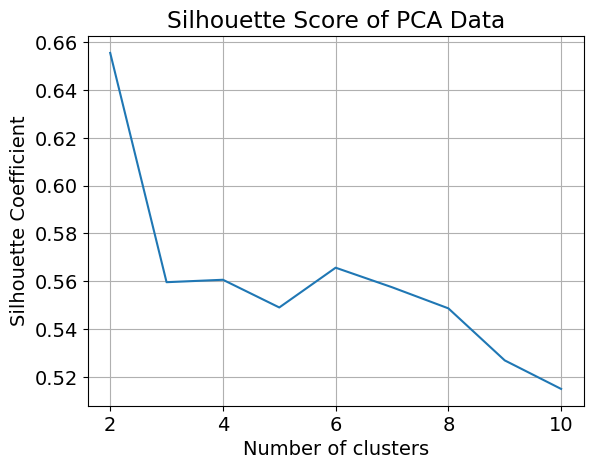

In [17]:
plt.figure()
plt.plot(k_range, scores2)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Score of PCA Data')
plt.grid(True)
plt.show()

While 2 has the highest score for the PCA data, we'll use the second highest score (6) to demonstrate K-means clustering. I've chosen to not use the 3 'target' classes and the original data out of curiosity.

### Kmeans Clustering: 6 Categories

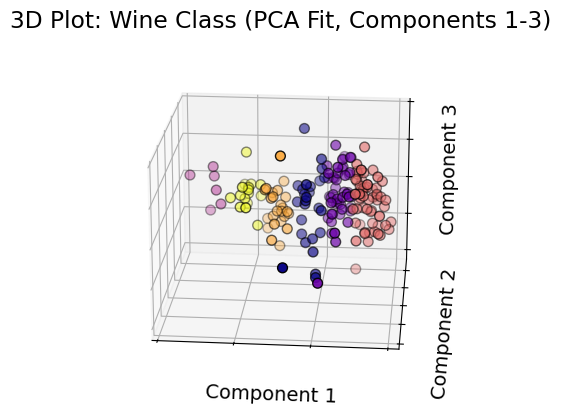

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', elev=20, azim=95)

kmeans = KMeans(n_clusters=6, n_init=10, random_state=1)
cluster_labels = kmeans.fit_predict(X)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=cluster_labels, cmap='plasma', edgecolor='k', s=50)
ax.set_title(f'3D Plot: Wine Class (PCA Fit, Components 1-3)')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

plt.show()

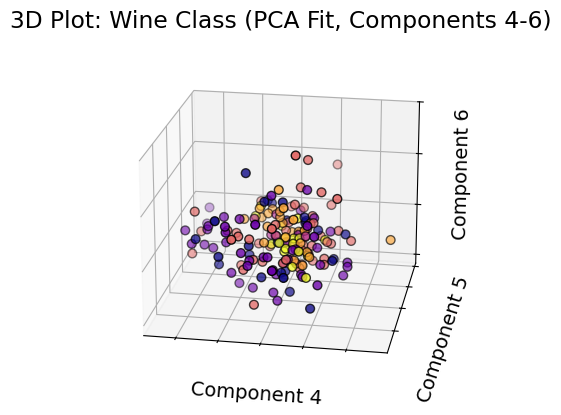

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', elev=20, azim=100)

ax.scatter(X[:, 3], X[:, 4], X[:, 5], c=cluster_labels, cmap='plasma', edgecolor='k', s=40)
ax.set_title(f'3D Plot: Wine Class (PCA Fit, Components 4-6)')
ax.set_xlabel('Component 4')
ax.set_ylabel('Component 5')
ax.set_zlabel('Component 6')

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

plt.show()

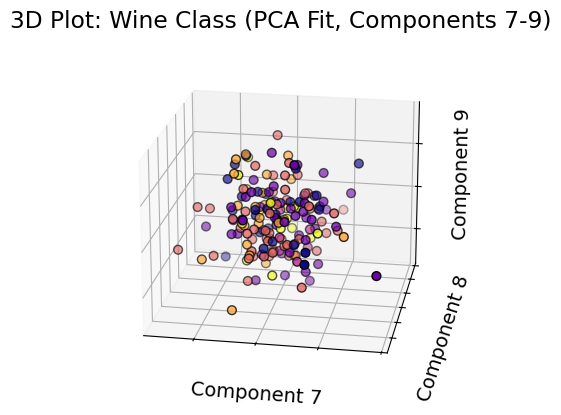

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', elev=20, azim=100)

ax.scatter(X[:, 6], X[:, 7], X[:, 8], c=cluster_labels, cmap='plasma', edgecolor='k', s=40)
ax.set_title(f'3D Plot: Wine Class (PCA Fit, Components 7-9)')
ax.set_xlabel('Component 7')
ax.set_ylabel('Component 8')
ax.set_zlabel('Component 9')

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

plt.show()

#### 2D Plot

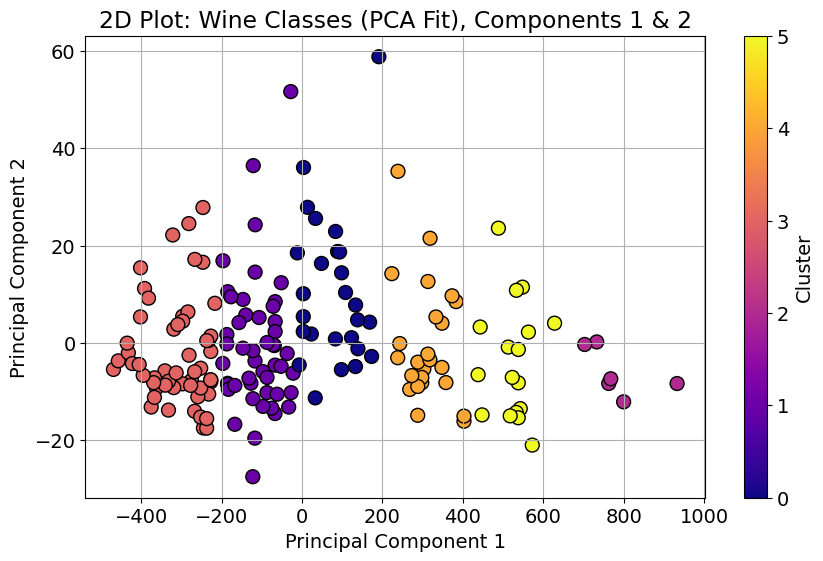

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='plasma', edgecolor='k', s=100)
plt.title(f'2D Plot: Wine Classes (PCA Fit), Components 1 & 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()